In [1]:
### Packages ###
import nltk
import pandas as pd
from utils import *
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from gensim.parsing.preprocessing import STOPWORDS

[nltk_data] Downloading package punkt to /Users/simondn/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/simondn/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/simondn/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


# Input

In [2]:
### Number of Topics ###
NumTopics = 5

### Display ###
pd.set_option('display.max_colwidth', None)  # Show full column width
pd.set_option('display.width', None)         # Auto-detect terminal width



# Topic Modelling

In [3]:
### Get Documents ###
Vatican1Documents = ChooseCouncilFunction('I', 'it')
Vatican2Documents = ChooseCouncilFunction('II', 'it')

In [4]:
### Text DataFrame ###
TextDataFrame_1 = pd.DataFrame({
    "Text": [
        Vatican1Documents[0]["Text"],
        Vatican1Documents[1]["Text"]]})

TextDataFrame_2 = pd.DataFrame({
    "Text": [
        Vatican2Documents[0]["Text"],
        Vatican2Documents[1]["Text"],
        Vatican2Documents[2]["Text"],
        Vatican2Documents[3]["Text"],
        Vatican2Documents[4]["Text"],
        Vatican2Documents[5]["Text"],
        Vatican2Documents[6]["Text"],
        Vatican2Documents[7]["Text"],
        Vatican2Documents[8]["Text"],
        Vatican2Documents[9]["Text"],
        Vatican2Documents[10]["Text"],
        Vatican2Documents[11]["Text"],
        Vatican2Documents[12]["Text"],
        Vatican2Documents[13]["Text"],
        Vatican2Documents[14]["Text"],
        Vatican2Documents[15]["Text"]
        ]})

In [5]:
### Stop Words ###
nltk.download('stopwords')
nltk.download('punkt')
NLTKStopWords = set(stopwords.words('italian')).union(STOPWORDS)  # Combine both


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/simondn/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/simondn/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [6]:
### Topic Modelling ###
Results_Vatican1 = TopicModellingFunction(TextDataFrame_1, NumTopics, NLTKStopWords)
Results_Vatican2 = TopicModellingFunction(TextDataFrame_2, NumTopics, NLTKStopWords)
TopTerms_Vatican1 = Results_Vatican1["df_output"]["TopTerms"]
TopTerms_Vatican2 = Results_Vatican2["df_output"]["TopTerms"]

In [7]:
print(TopTerms_Vatican1)
print(TopTerms_Vatican2)

0        chiesa, pietro, cristo, beato, potere, tutta, signore, primato, romano, pontefice
1    chiesa, verit, essere, ragione, anatema, divina, qualcuno, tutte, cristo, rivelazione
2      chiesa, cristo, pietro, signore, verit, tutte, stesso, pontefice, apostoli, primato
3    chiesa, cristo, signore, primato, pietro, dottrina, potere, pontefice, beato, supremo
4           chiesa, essere, pietro, cristo, signore, perch, stesso, verit, qualcuno, tutta
Name: TopTerms, dtype: object
0                              umana, uomini, chiesa, mondo, cristo, essere, libert, sociale, infatti, tempo
1         chiesa, archiepiscopus, titulo, presbyter, cardinalis, cristo, cattolica, chiese, orientali, prima
2                      chiesa, cristo, spirito, laici, apostolato, uomini, presbiteri, essere, fedeli, mondo
3             vescovi, chiesa, pastorale, cristo, ministero, diocesi, vescovo, sacerdoti, alunni, formazione
4    istituti, presbyter, titulo, cardinalis, chiesa, archiepiscopus, cristo, r

# Word Frequency

In [8]:
### Combine all documents ###
Vatican1FullText = " ".join([doc["Text"] for doc in Vatican1Documents])
Vatican2FullText = " ".join([doc["Text"] for doc in Vatican2Documents])


In [9]:
### Word Frequency ###
Vatican1WordFreq = WordFrequencyAnalysis(Vatican1FullText, NLTKStopWords, TopN=20)
Vatican2WordFreq = WordFrequencyAnalysis(Vatican2FullText, NLTKStopWords, TopN=20)


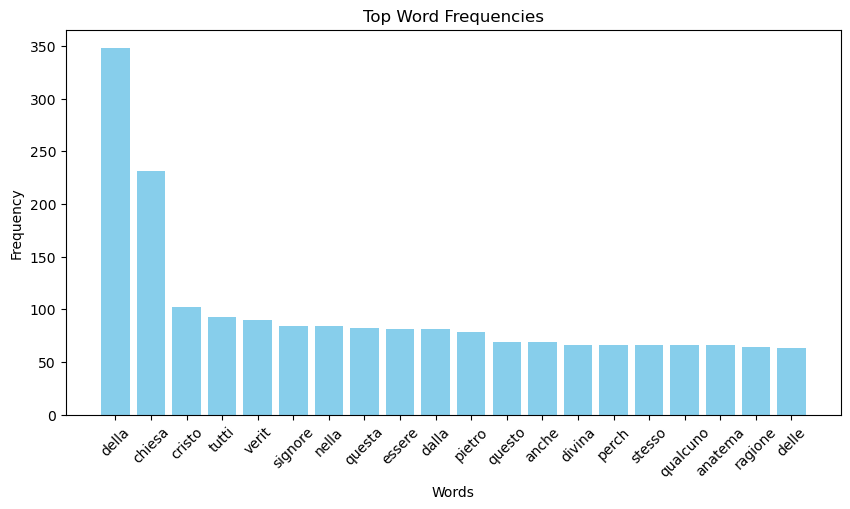

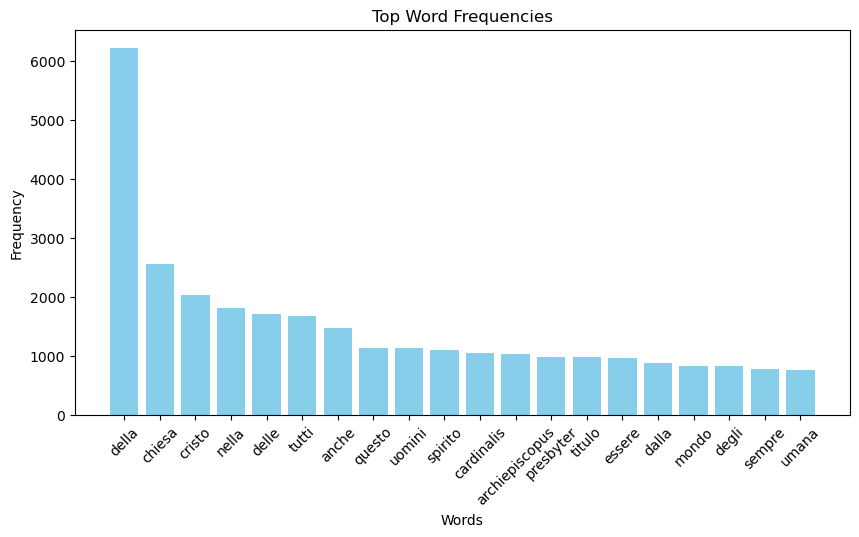

In [ ]:
plt.figure(figsize=(10, 5))
plt.bar(Vatican1WordFreq['Word'], Vatican1WordFreq['Frequency'], color='skyblue')
plt.xticks(rotation=45)
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.title("Top Word Frequencies")
plt.show()

plt.figure(figsize=(10, 5))
plt.bar(Vatican2WordFreq['Word'], Vatican2WordFreq['Frequency'], color='skyblue')
plt.xticks(rotation=45)
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.title("Top Word Frequencies")
plt.show()



In [ ]:
def CompareWordFrequencies(DataFrame1, DataFrame2):

    MergedDataFrame = pd.merge(DataFrame1, DataFrame2, on="Word", how="outer", suffixes=("DataFrame1", "DataFrame2"))                        # Merge DataFrames
    MergedDataFrame["Ratio_DataFrame2/DataFrame1"] = MergedDataFrame["Frequency_DataFrame2"] / (MergedDataFrame["Frequency_DataFrame1"] + 1) # Ratio
    MergedDataFrame = MergedDataFrame.sort_values(by="Ratio_DataFrame2/DataFrame1", ascending=False)                                         # Sot by Ratio

    return MergedDataFrame


In [16]:

# Compare Vatican I vs. Vatican II
ComparisonTable = CompareWordFrequencies(Vatican1WordFreq, Vatican2WordFreq)

# Display the first 15 rows
print(ComparisonTable.head(15))


              Word  Frequency_VaticanI  Frequency_VaticanII  \
20          uomini                 0.0               1126.0   
21         spirito                 0.0               1100.0   
22      cardinalis                 0.0               1050.0   
23  archiepiscopus                 0.0               1020.0   
24       presbyter                 0.0                981.0   
25          titulo                 0.0                978.0   
26           mondo                 0.0                827.0   
27           degli                 0.0                820.0   
28          sempre                 0.0                781.0   
29           umana                 0.0                760.0   
19           delle                63.0               1711.0   
6            nella                84.0               1812.0   
12           anche                69.0               1461.0   
2           cristo               102.0               2026.0   
0            della               348.0               62